In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
import requests
import os 
import csv
import pandas as pd
import numpy as np

# Construct the URL for the API call
symbol = 'AAPL'
api_key = 'OQLLSP66PGYDG45E'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={api_key}&outputsize=full'



In [5]:
response = requests.get(url)
data = response.json()

In [6]:
print(type(response))

<class 'requests.models.Response'>


In [7]:
time_series_daily = data['Time Series (Daily)']


In [121]:
with open('/content/drive/MyDrive/Futurense Hackaton/apple_stock_data.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    csv_writer.writerow(headers)

    
    for date, daily_data in time_series_daily.items():
        row = [date, daily_data['1. open'], daily_data['2. high'], daily_data['3. low'], daily_data['4. close'], daily_data['6. volume']]
        csv_writer.writerow(row)

csv_file.close()

In [122]:
# import requests
# import os 
# import csv
# import pandas as pd
# import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [182]:
data = pd.read_csv('/content/drive/MyDrive/Futurense Hackaton/AAPL_sentiment.csv')

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.65,26.34,25.50,26.34,24.44,270597600,0.070389,1133.0
1,2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000,0.133635,1430.0
2,2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600,0.072042,1949.0
3,2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600,0.074369,2289.0
4,2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000,0.051595,2235.0


In [10]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
1183,2020-09-15,118.33,118.83,113.61,115.54,115.54,184642000,NaN,NaN
1184,2020-09-16,115.23,116.00,112.04,112.13,112.13,154679000,NaN,NaN
1185,2020-09-17,109.72,112.20,108.71,110.34,110.34,178011000,NaN,NaN
1186,2020-09-18,110.40,110.88,106.09,106.84,106.84,287104900,NaN,NaN
1187,2020-09-21,104.54,110.19,103.10,110.08,110.08,195050000,NaN,NaN


In [11]:
data.dropna(inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
917,2019-08-26,51.47,51.80,51.26,51.62,51.12,104174400,0.072340,888.0
918,2019-08-27,51.97,52.14,50.88,51.04,50.54,103493200,0.117541,962.0
919,2019-08-28,51.03,51.43,50.83,51.38,50.88,63755200,0.061477,895.0
920,2019-08-29,52.13,52.33,51.67,52.25,51.74,83962000,0.056460,1083.0
921,2019-08-30,52.54,52.61,51.80,52.19,51.67,84573600,0.106096,1005.0


In [13]:
data_fin = data.drop(['ts_polarity','twitter_volume'],axis=1)

In [14]:
data_fin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.65,26.34,25.50,26.34,24.44,270597600
1,2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000
2,2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600
3,2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600
4,2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000


In [19]:
dataset = df.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

876

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09160305],
       [0.0743568 ],
       [0.0610687 ],
       [0.03336161],
       [0.03675431],
       [0.04693243],
       [0.05626237],
       [0.03958157],
       [0.05343511],
       [0.03788521],
       [0.03477523],
       [0.03562341],
       [0.0322307 ],
       [0.06587504],
       [0.05286966],
       [0.05654509],
       [0.01357082],
       [0.0178117 ],
       [0.03901612],
       [0.03307888],
       [0.02035623],
       [0.03251343],
       [0.03760249],
       [0.02063896],
       [0.02714165],
       [0.02714165],
       [0.02233531],
       [0.01865988],
       [0.02063896],
       [0.03788521],
       [0.04778061],
       [0.03562341],
       [0.03392706],
       [0.03958157],
       [0.02516257],
       [0.03449251],
       [0.03873339],
       [0.03986429],
       [0.03845066],
       [0.06361323],
       [0.06502686],
       [0.07011592],
       [0.08001131],
       [0.07237772],
       [0.06700594],
       [0.06757139],
       [0.06785411],
       [0.074

In [21]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
 
x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.09160305, 0.0743568 , 0.0610687 , 0.03336161, 0.03675431,
       0.04693243, 0.05626237, 0.03958157, 0.05343511, 0.03788521,
       0.03477523, 0.03562341, 0.0322307 , 0.06587504, 0.05286966,
       0.05654509, 0.01357082, 0.0178117 , 0.03901612, 0.03307888,
       0.02035623, 0.03251343, 0.03760249, 0.02063896, 0.02714165,
       0.02714165, 0.02233531, 0.01865988, 0.02063896, 0.03788521,
       0.04778061, 0.03562341, 0.03392706, 0.03958157, 0.02516257,
       0.03449251, 0.03873339, 0.03986429, 0.03845066, 0.06361323,
       0.06502686, 0.07011592, 0.08001131, 0.07237772, 0.06700594,
       0.06757139, 0.06785411, 0.07492225, 0.07690133, 0.09047215,
       0.09951937, 0.09838846, 0.09923664, 0.09923664, 0.10460843,
       0.10065027, 0.09754029, 0.09443031, 0.11082839, 0.12326831])]
[0.11931014984450106]

[array([0.09160305, 0.0743568 , 0.0610687 , 0.03336161, 0.03675431,
       0.04693243, 0.05626237, 0.03958157, 0.05343511, 0.03788521,
       0.03477523, 0.03562341, 0.03

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


In [164]:

model.fit(x_train, y_train, batch_size=15 , epochs=60)

Epoch 1/60
55/55 [==============================] - 1s 19ms/step - loss: 3.3378e-04
Epoch 2/60
55/55 [==============================] - 1s 15ms/step - loss: 3.2618e-04
Epoch 3/60
55/55 [==============================] - 1s 13ms/step - loss: 3.5989e-04
Epoch 4/60
55/55 [==============================] - 0s 9ms/step - loss: 3.2029e-04
Epoch 5/60
55/55 [==============================] - 0s 8ms/step - loss: 3.2032e-04
Epoch 6/60
55/55 [==============================] - 0s 8ms/step - loss: 3.2285e-04
Epoch 7/60
55/55 [==============================] - 0s 9ms/step - loss: 3.2046e-04
Epoch 8/60
55/55 [==============================] - 0s 9ms/step - loss: 3.1507e-04
Epoch 9/60
55/55 [==============================] - 0s 8ms/step - loss: 3.6733e-04
Epoch 10/60
55/55 [==============================] - 1s 14ms/step - loss: 3.0917e-04
Epoch 11/60
55/55 [==============================] - 1s 12ms/step - loss: 3.0603e-04
Epoch 12/60
55/55 [==============================] - 1s 12ms/step - loss: 3.3366

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models','Apple_Stock_Market_model_historical'))

In [ ]:
from tensorflow.keras.models import load_model 


In [167]:
sm_model = load_model('/content/drive/MyDrive/models/Apple_Stock_Market_model_historical')

In [168]:
 test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

 
predictions = sm_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 9ms/step


0.8853847333541441

In [169]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

accuracy_score = 1 - mse / np.var(y_test)

print("Model accuracy score:", accuracy_score)

Model accuracy score: 0.33080138015032057


In [170]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared :', metrics.r2_score(y_test, predictions))

Root Mean Squared Error: 0.8853847333541441
R-squared : 0.33080138015032057


In [171]:
y_pred = sm_model.predict(x_test)


2/2 [==============================] - 0s 8ms/step


In [172]:
print('Predicted:', y_pred)
print('Actual:', y_test)

Predicted: [[0.79700327]
 [0.79548323]
 [0.7839782 ]
 [0.80976796]
 [0.81657493]
 [0.8285055 ]
 [0.82758695]
 [0.8007717 ]
 [0.8111142 ]
 [0.823208  ]
 [0.81164134]
 [0.8225168 ]
 [0.8342438 ]
 [0.8287121 ]
 [0.8222412 ]
 [0.8387307 ]
 [0.8174491 ]
 [0.84994686]
 [0.85868514]
 [0.8577292 ]
 [0.8482237 ]
 [0.85477287]
 [0.86741155]
 [0.86068857]
 [0.8893189 ]
 [0.8572087 ]
 [0.83142173]
 [0.76298547]
 [0.78716815]
 [0.79379433]
 [0.8174597 ]
 [0.8024826 ]
 [0.80072474]
 [0.85907555]
 [0.81501496]
 [0.8155423 ]
 [0.8495244 ]
 [0.87303126]
 [0.8722584 ]
 [0.889217  ]
 [0.8881064 ]
 [0.8254869 ]
 [0.8554692 ]
 [0.8358538 ]
 [0.84265447]
 [0.8621108 ]]
Actual: [[49.26]
 [48.81]
 [49.7 ]
 [49.99]
 [50.41]
 [50.36]
 [49.33]
 [49.63]
 [50.12]
 [49.75]
 [50.14]
 [50.61]
 [50.43]
 [50.15]
 [50.72]
 [49.96]
 [51.1 ]
 [51.5 ]
 [51.46]
 [51.05]
 [51.23]
 [51.71]
 [51.49]
 [52.54]
 [51.4 ]
 [50.31]
 [47.68]
 [48.58]
 [49.08]
 [50.17]
 [49.75]
 [49.63]
 [51.73]
 [50.19]
 [49.94]
 [51.12]
 [52.07]
 [5

In [90]:
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()


dates_test = data_fin.index[-len(y_test_flat):]
dates_pred = data_fin.index[-len(y_pred_flat):]

In [91]:
df_1 = pd.DataFrame({'Dates': dates_pred})
df_1['Real'] = y_test_flat
df_1['Predicted'] = y_pred_flat

In [92]:
df_1

,Dates,Real,Predicted
0,2019-06-27,49.26,0.814273
1,2019-06-28,48.81,0.809552
2,2019-07-01,49.70,0.796238
3,2019-07-02,49.99,0.825345
4,2019-07-03,50.41,0.830748
5,2019-07-05,50.36,0.843281
6,2019-07-08,49.33,0.840670
7,2019-07-09,49.63,0.809808
8,2019-07-10,50.12,0.823285
9,2019-07-11,49.75,0.836217


<ipython-input-173-7347cdbeaf6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


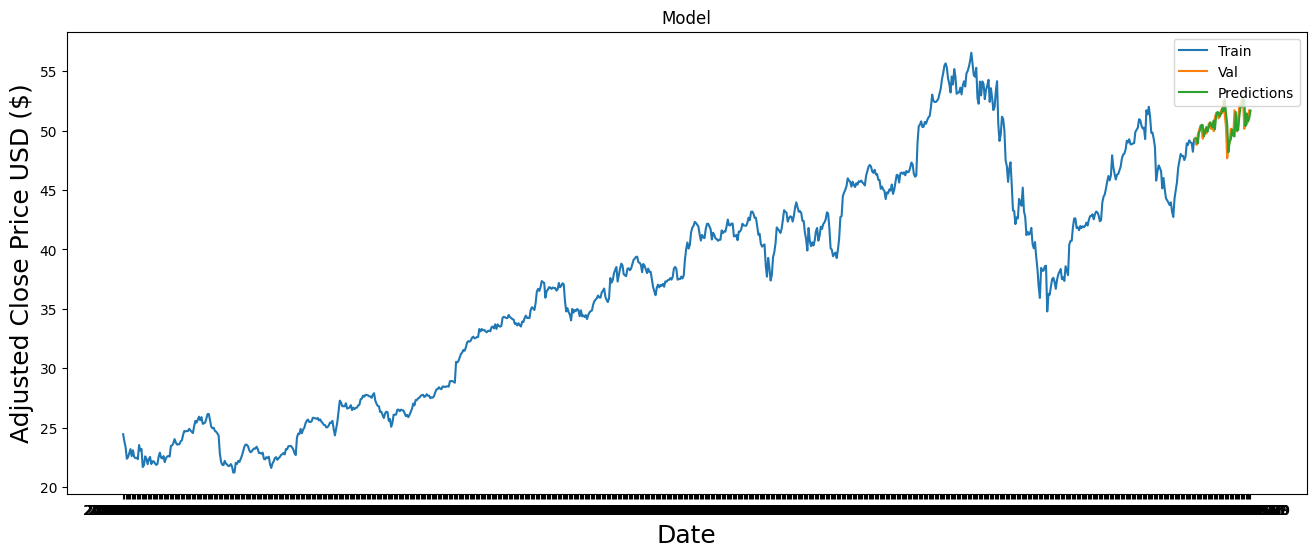

In [173]:
import matplotlib.pyplot as plt 

train = data_fin[:training_data_len]
valid = data_fin[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [163]:
pro = valid[['Adj Close','Predictions']]

In [55]:
stock_monthly = pro.to_csv('/content/drive/MyDrive/Futurense Hackaton/real-pred-2-month.csv',index=True)

In [175]:
stock_monthly_1 = pd.read_csv('/content/drive/MyDrive/Futurense Hackaton/real-pred-2-month.csv')

In [179]:
stock_monthly_1 =stock_monthly_1.drop(stock_monthly_1.columns[0],axis=1)

In [180]:
stock_monthly_1

,Adj Close,Predictions
0,49.26,49.064030
1,48.81,48.973743
2,49.70,48.530900
3,49.99,49.458720
4,50.41,49.685005
5,50.36,50.112660
6,49.33,50.037163
7,49.63,48.996914
8,50.12,49.392864
9,49.75,49.839470


In [183]:
import pandas as pd

merged_df = pd.merge(data, stock_monthly_1, on='Adj Close')

print(merged_df)

          Date   Open   High    Low  Close  Adj Close     Volume  ts_polarity  \
0   2018-08-07  52.33  52.38  51.69  51.78      50.31  102349600     0.116948   
1   2019-08-02  51.38  51.61  50.41  51.01      50.31  163448400     0.091402   
2   2018-10-29  54.80  54.92  51.52  53.06      51.74  183742000     0.107084   
3   2019-08-29  52.13  52.33  51.67  52.25      51.74   83962000     0.056460   
4   2019-04-25  51.71  51.94  51.28  51.32      50.43   74172800     0.139272   
5   2019-07-16  51.15  51.53  50.88  51.13      50.43   67467200     0.142708   
6   2019-04-26  51.22  51.25  50.53  51.08      50.19   74596400     0.177469   
7   2019-08-14  50.79  51.61  50.65  50.69      50.19  146189600     0.117263   
8   2019-06-27  50.07  50.39  49.89  49.94      49.26   83598800     0.143246   
9   2019-06-28  49.67  49.88  49.26  49.48      48.81  124442400     0.098834   
10  2019-07-01  50.79  51.12  50.16  50.39      49.70  109012000     0.127408   
11  2019-07-02  50.35  50.78

In [184]:
merged_df.to_csv('/content/drive/MyDrive/Futurense Hackaton/apple_merged.csv')

In [185]:
data_f = pd.read_csv('/content/drive/MyDrive/Futurense Hackaton/apple_merged.csv')

In [188]:
data_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume,Predictions
0,2018-08-07,52.33,52.38,51.69,51.78,50.31,102349600,0.116948,1111.0,50.90224
1,2019-08-02,51.38,51.61,50.41,51.01,50.31,163448400,0.091402,1065.0,50.90224
2,2018-10-29,54.80,54.92,51.52,53.06,51.74,183742000,0.107084,932.0,50.57998
3,2019-08-29,52.13,52.33,51.67,52.25,51.74,83962000,0.056460,1083.0,50.57998
4,2019-04-25,51.71,51.94,51.28,51.32,50.43,74172800,0.139272,917.0,50.29310


In [187]:
data_f = data_f.drop(data_f.columns[0],axis=1)

In [190]:
data_f = data_f.drop(['Open','Close','High','Low','Volume','ts_polarity','twitter_volume'],axis=1)
data_f

,Date,Adj Close,Predictions
0,2018-08-07,50.31,50.902240
1,2019-08-02,50.31,50.902240
2,2018-10-29,51.74,50.579980
3,2019-08-29,51.74,50.579980
4,2019-04-25,50.43,50.293100
5,2019-07-16,50.43,50.293100
6,2019-04-26,50.19,51.391075
7,2019-08-14,50.19,51.391075
8,2019-06-27,49.26,49.064030
9,2019-06-28,48.81,48.973743


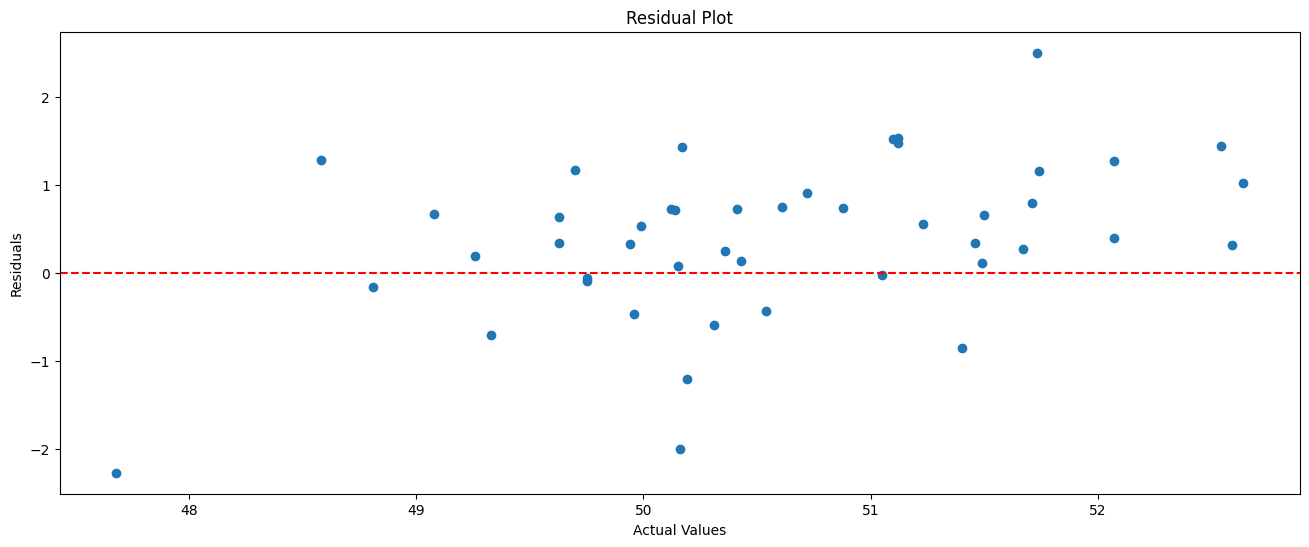

In [44]:
# Create a residual plot
residuals = y_test - predictions
plt.figure(figsize=(16,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()